In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, clear_output
import scipy.optimize as spo
import iminuit
import uproot
import json
import multiprocessing as mp
import time
from scipy.optimize import curve_fit
import simulation_utility as su
import scipy

In [2]:
def gauss(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2 / (2.*sigma**2))
def landau(x,a,loc,scale):
    return 1.6*a*np.exp(-( (x-loc)/scale + np.exp(-(x-loc)/scale) )/2)
def expgauss(x,a,mu,sigma,tau):
    return a/2 * np.exp((sigma**2-2*x*tau)/(2*tau**2))*(1-scipy.special.erf((sigma**2+tau*(mu-x))/(np.sqrt(2)*sigma*tau) ))
def fit_spectra(PE = 1, angle = 0, voltage = 25, xlim = (200,12000), bins = 150):
    path = f'ABALONE_{voltage}kV/'
    print(f'Results with {PE} PE at angle {angle} deg')
    
    stat = np.load(path+f'electron_counts/electron_count_{PE}PE_{angle}angle.npy')
    e_ID = np.load(path+f'electron_counts/electron_count_event_{PE}PE_{angle}angle.npy')
    area_collection = np.load(path+f'electron_counts/electron_count_area_{PE}PE_{angle}angle.npy')
    Edep_dist = np.load(path+f'electron_counts/electron_count_energy_{PE}PE_{angle}angle.npy')
    
    area_straight_list = np.array([area_collection[i] for i in e_ID[0]])
    area_returning_list = np.array([area_collection[i] for i in e_ID[1]])
    area_non_list = np.array([area_collection[i] for i in e_ID[2]])
    area_space = np.linspace(xlim[0],xlim[1], bins)
    hs, t = np.histogram(area_straight_list, bins=area_space)
    hr, t = np.histogram(area_returning_list, bins=area_space)
    hn, t = np.histogram(area_non_list, bins=area_space)
    tc = (t[:-1] + t[1:])/2.
    #yhist, binedges = np.histogram(area_straight_list,bins=bins)
    #yhistr, binedgesr = np.histogram(area_returning_list,bins=bins)
    #yhistn, binedgesn = np.histogram(area_non_list,bins=bins)
    #bc = np.array((binedges[1:] + binedges[:-1])/2)
    #bcn = np.array((binedgesn[1:] + binedgesn[:-1])/2)
    #x = np.linspace(,bins)
    guess = (np.max(hs), tc[np.argmax(hs)],1000)
    popt, pcov = curve_fit(gauss, tc, hs, p0=guess)
    perr = np.sqrt(np.diag(pcov))
    guessn = (np.max(hn), tc[np.argmax(hn)],100,200)
    print(guessn)
    poptn, pcovn = curve_fit(expgauss, tc, hn, p0=guessn)
    perrn = np.sqrt(np.diag(pcovn))
    
    plt.figure(figsize=(8,4.5))
    plt.plot(tc,hs,label = "Straight",color='g')
    plt.plot(tc,hr,label = "Returning",color='b')
    plt.plot(tc,hn,label = "Non-Returning",color='r')
    plt.plot(t,gauss(t, *popt),ls='--',label="Gaussian Fit")
    plt.plot(t,expgauss(t, *poptn),ls='--',label="Non-Returning Fit")
    #plt.set_title("SiPM area count",fontsize=11)
    plt.xlabel('area [a.u.]',fontsize=12)
    plt.ylabel('conteggi',fontsize=12)
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.legend(fontsize=12)
    plt.savefig(path+"Fit_Spectra_"+str(PE)+"_pe_angle_"+str(angle)+"_voltage"+str(voltage),dpi=800)
    
    return popt

Results with 1 PE at angle 0 deg
(242, 765.3061224489795, 100, 200)


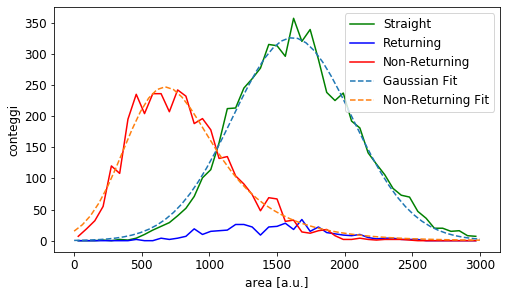

In [3]:
popt = fit_spectra(xlim = (0,3000), bins = 50,voltage=25)

Results with 1 PE at angle 0 deg
(310, 581.6326530612245, 100, 200)


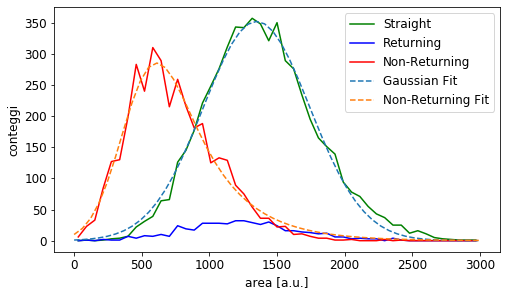

In [4]:
popt = fit_spectra(xlim = (0,3000), bins = 50,voltage=20)

Results with 1 PE at angle 0 deg


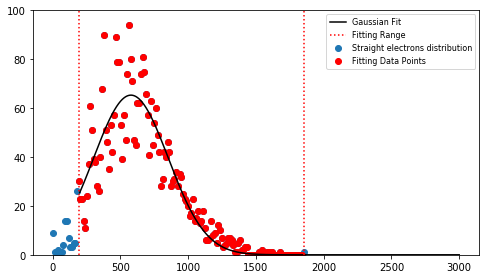

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.35
Portion of returning back-scattered electrons: 0.07
Portion of non-returning back-scattered electrons: 0.17
Portion of back-scattered electrons (returning+non-returning): 0.24
Portion of undetected electrons: 0.41


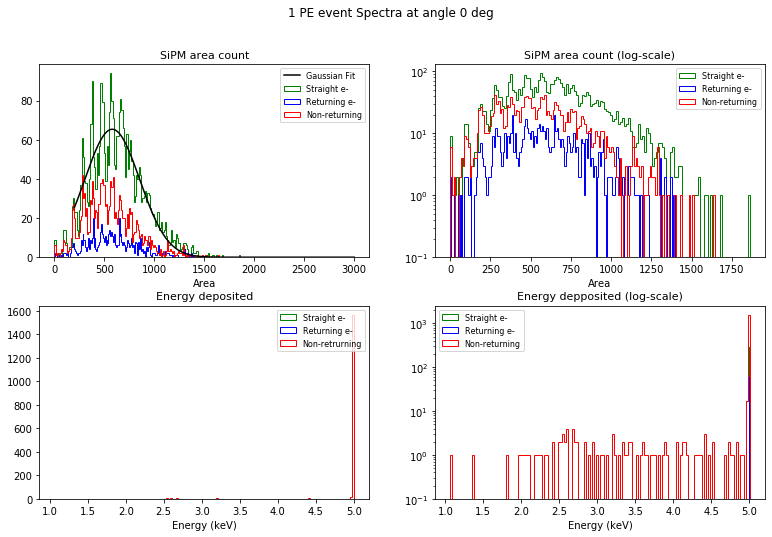

Results with 1 PE at angle 0 deg


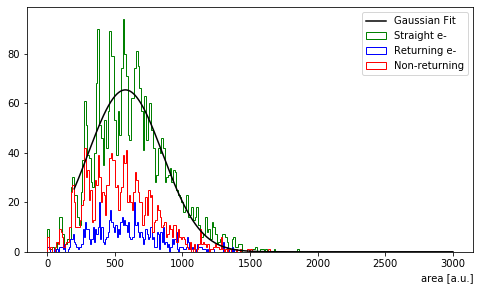

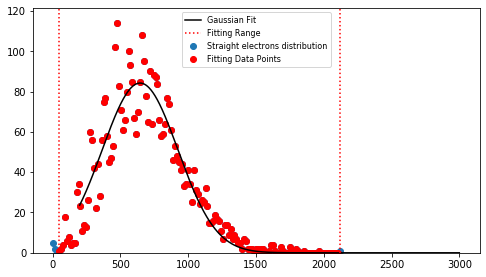

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.42
Portion of returning back-scattered electrons: 0.08
Portion of non-returning back-scattered electrons: 0.21
Portion of back-scattered electrons (returning+non-returning): 0.29
Portion of undetected electrons: 0.29


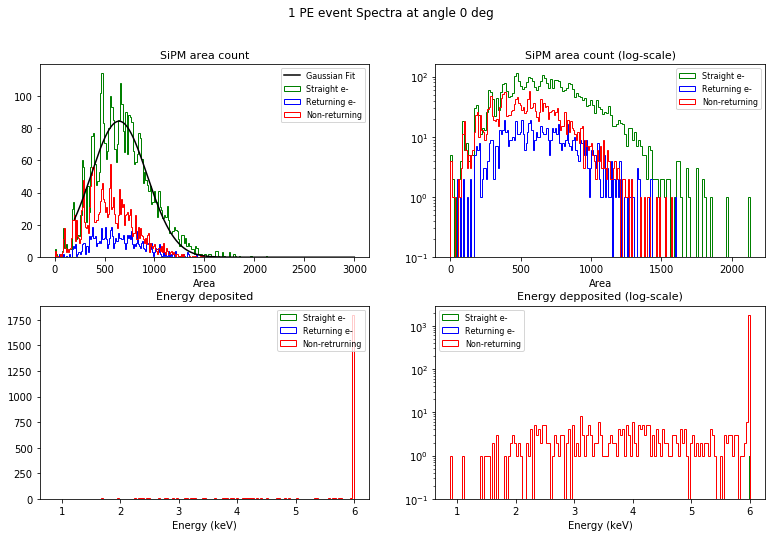

Results with 1 PE at angle 0 deg


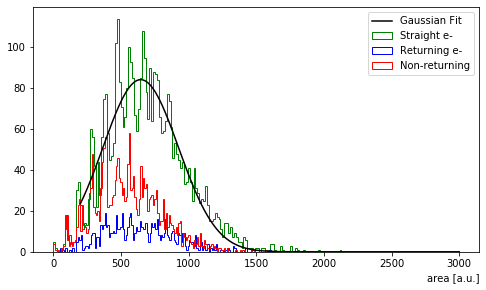

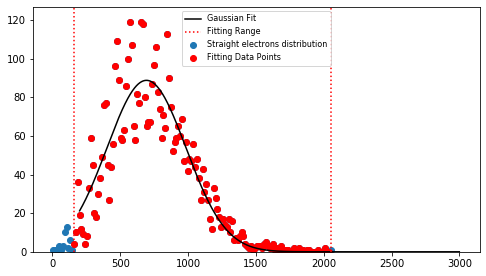

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.47
Portion of returning back-scattered electrons: 0.09
Portion of non-returning back-scattered electrons: 0.23
Portion of back-scattered electrons (returning+non-returning): 0.32
Portion of undetected electrons: 0.21


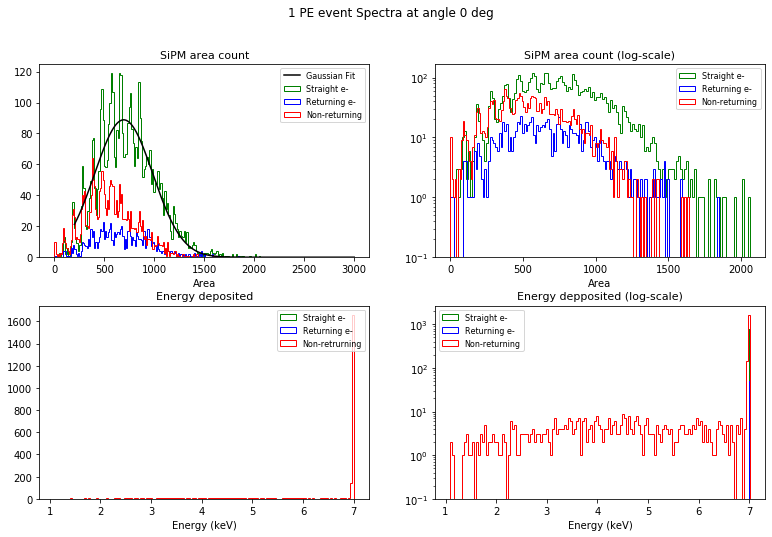

Results with 1 PE at angle 0 deg


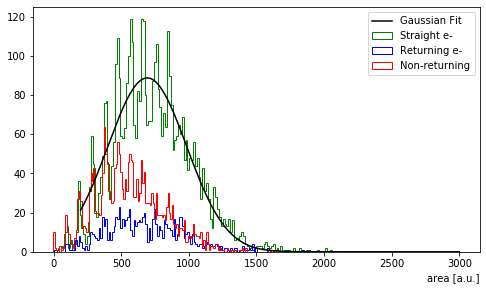

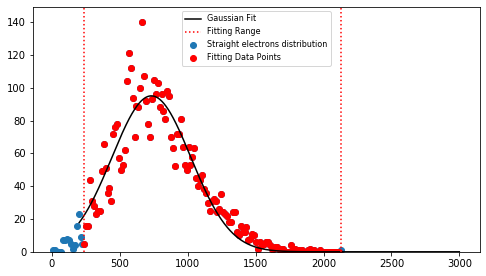

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.49
Portion of returning back-scattered electrons: 0.09
Portion of non-returning back-scattered electrons: 0.26
Portion of back-scattered electrons (returning+non-returning): 0.35
Portion of undetected electrons: 0.16


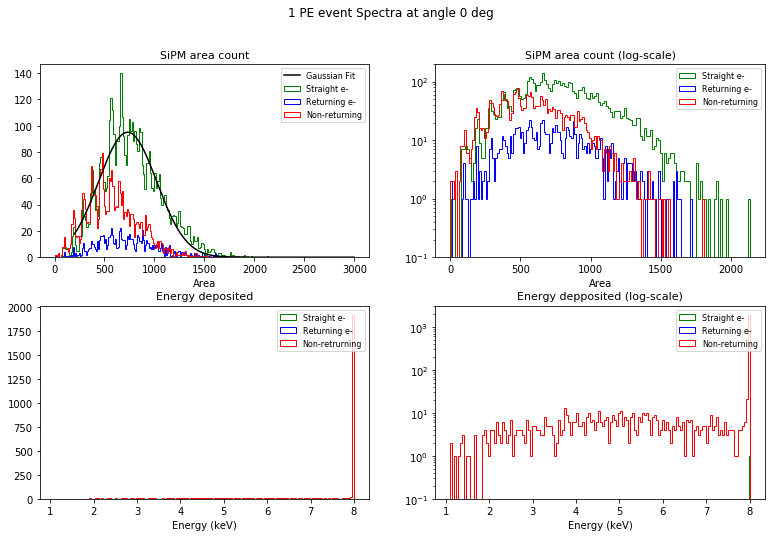

Results with 1 PE at angle 0 deg


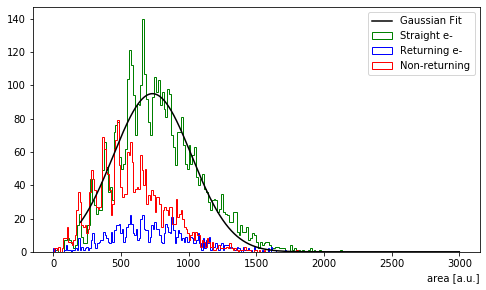

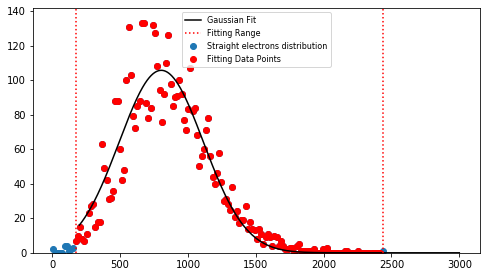

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.50
Portion of returning back-scattered electrons: 0.09
Portion of non-returning back-scattered electrons: 0.28
Portion of back-scattered electrons (returning+non-returning): 0.37
Portion of undetected electrons: 0.12


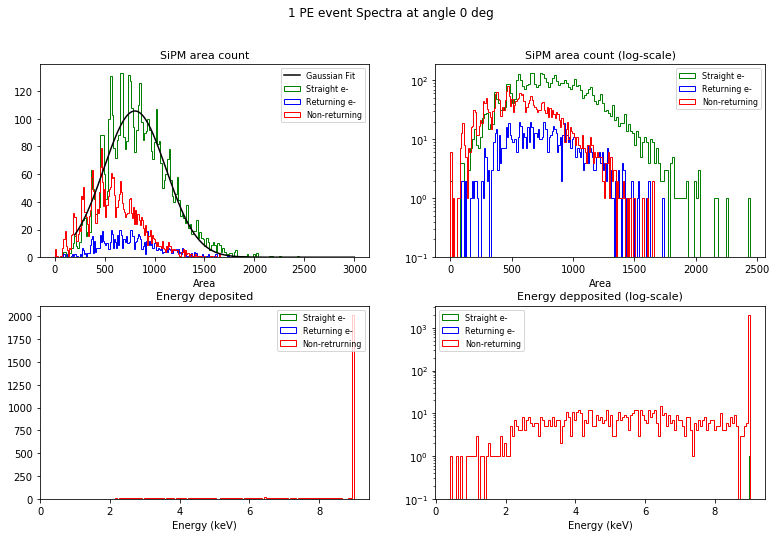

Results with 1 PE at angle 0 deg


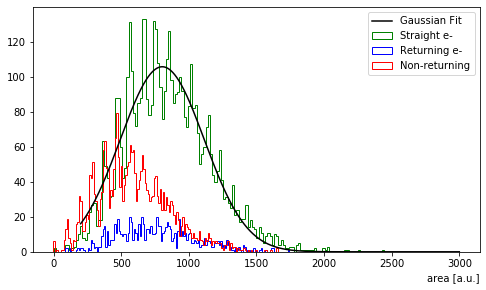

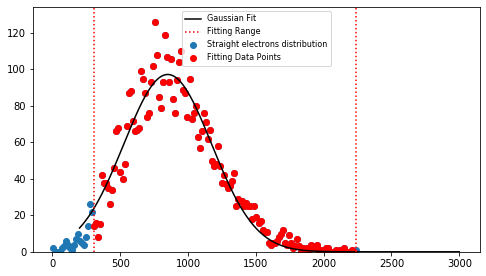

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.53
Portion of returning back-scattered electrons: 0.09
Portion of non-returning back-scattered electrons: 0.30
Portion of back-scattered electrons (returning+non-returning): 0.38
Portion of undetected electrons: 0.09


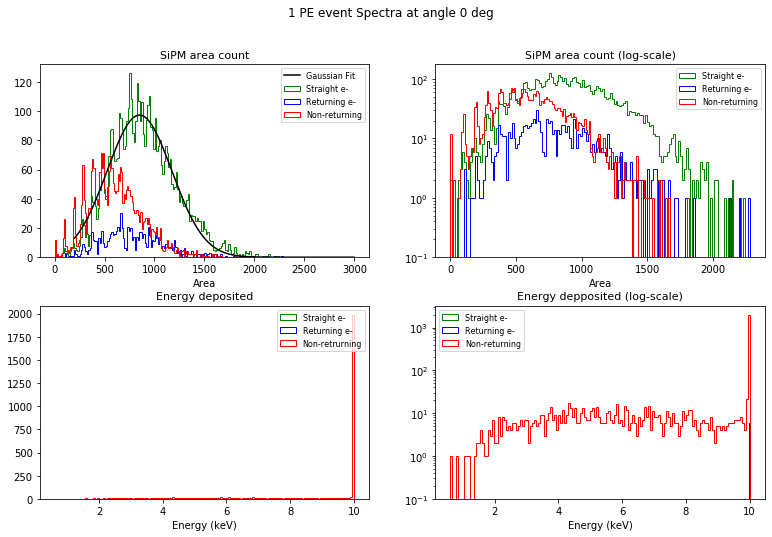

Results with 1 PE at angle 0 deg


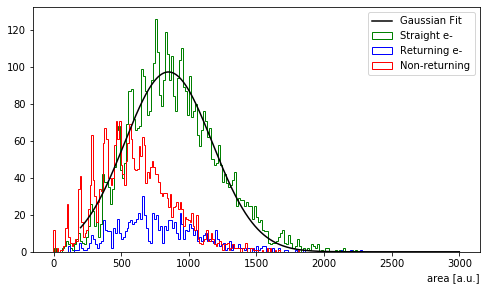

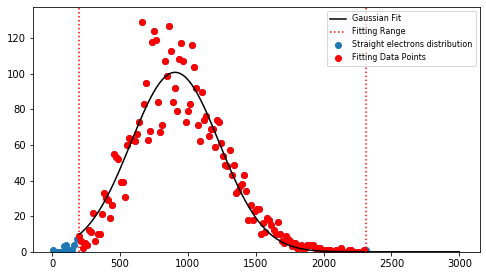

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.53
Portion of returning back-scattered electrons: 0.08
Portion of non-returning back-scattered electrons: 0.30
Portion of back-scattered electrons (returning+non-returning): 0.38
Portion of undetected electrons: 0.08


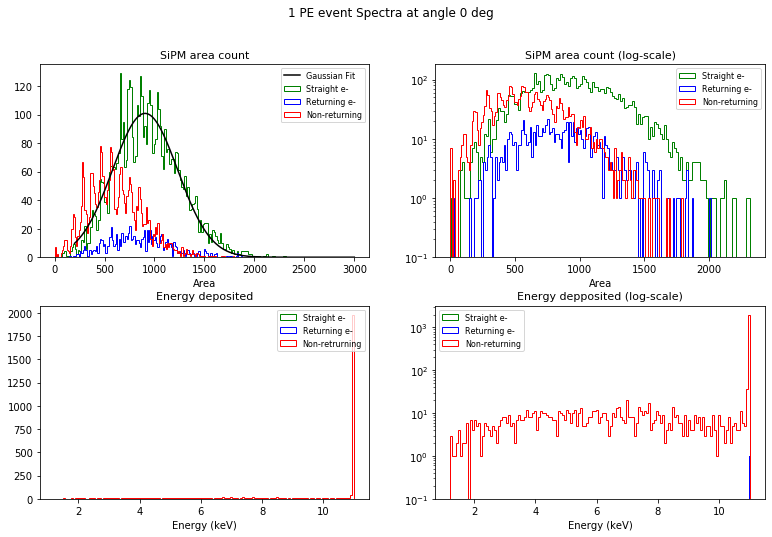

Results with 1 PE at angle 0 deg


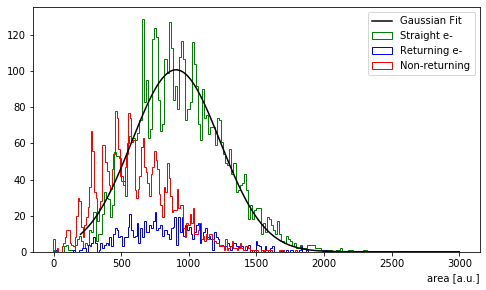

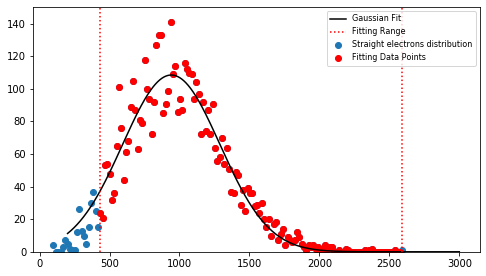

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.55
Portion of returning back-scattered electrons: 0.08
Portion of non-returning back-scattered electrons: 0.30
Portion of back-scattered electrons (returning+non-returning): 0.38
Portion of undetected electrons: 0.06


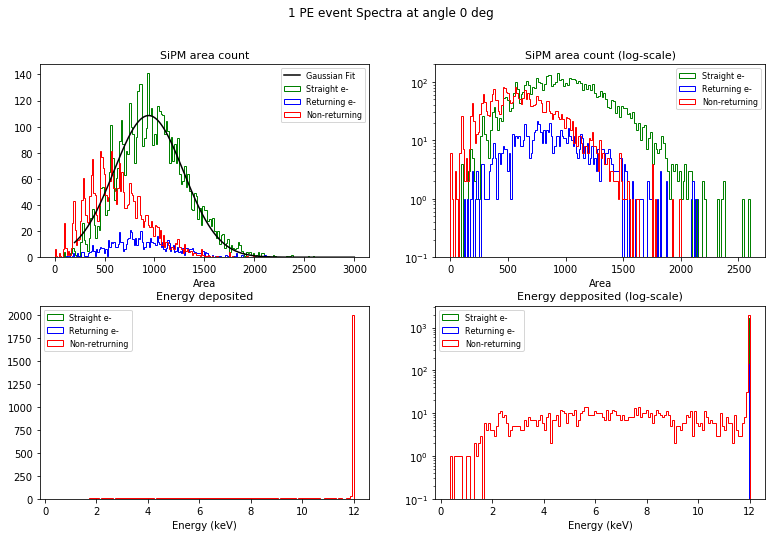

Results with 1 PE at angle 0 deg


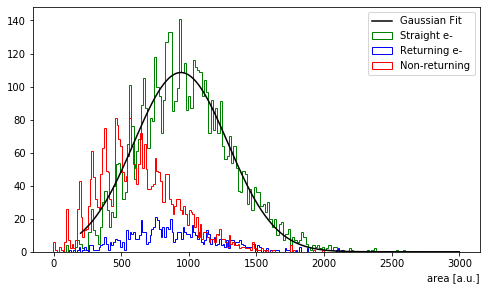

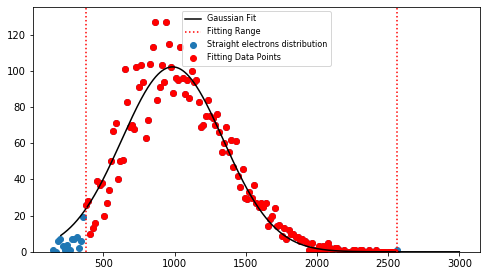

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.55
Portion of returning back-scattered electrons: 0.08
Portion of non-returning back-scattered electrons: 0.32
Portion of back-scattered electrons (returning+non-returning): 0.39
Portion of undetected electrons: 0.05


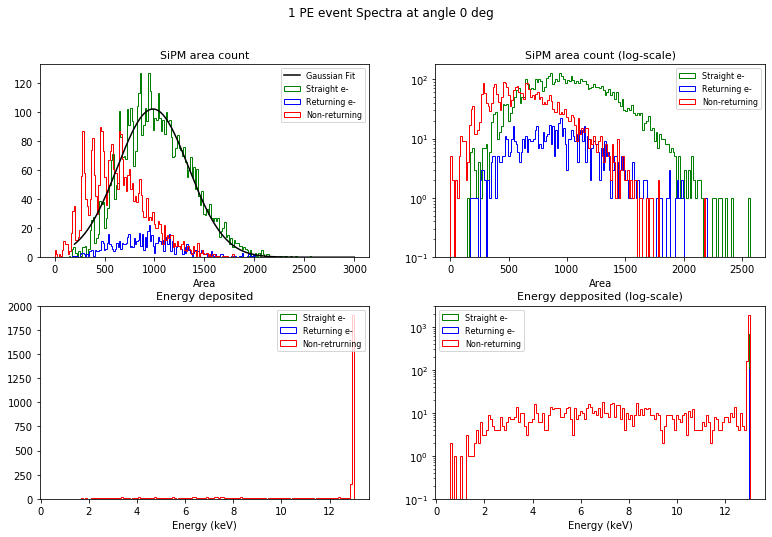

Results with 1 PE at angle 0 deg


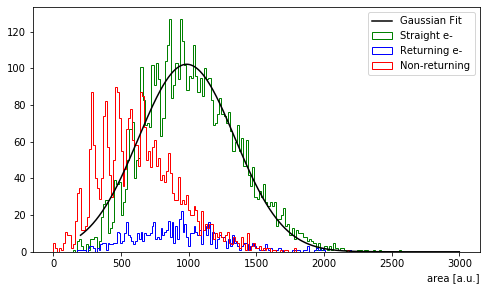

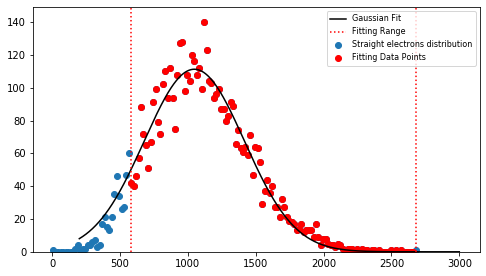

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.56
Portion of returning back-scattered electrons: 0.07
Portion of non-returning back-scattered electrons: 0.32
Portion of back-scattered electrons (returning+non-returning): 0.39
Portion of undetected electrons: 0.04


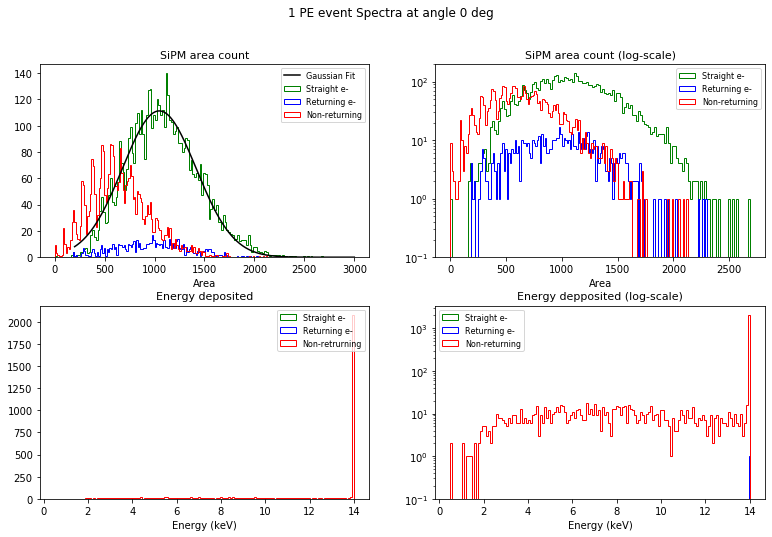

Results with 1 PE at angle 0 deg


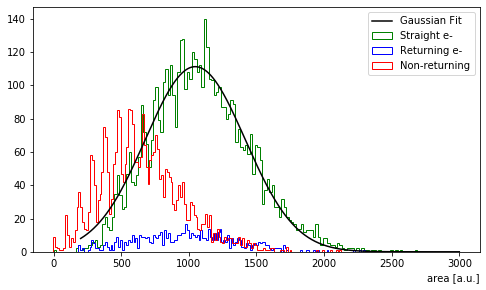

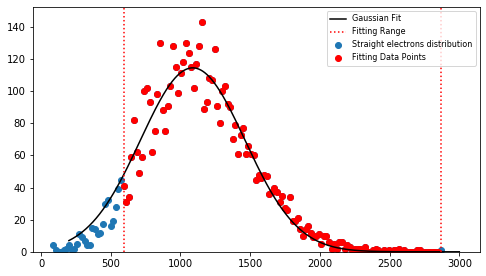

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.33
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.04


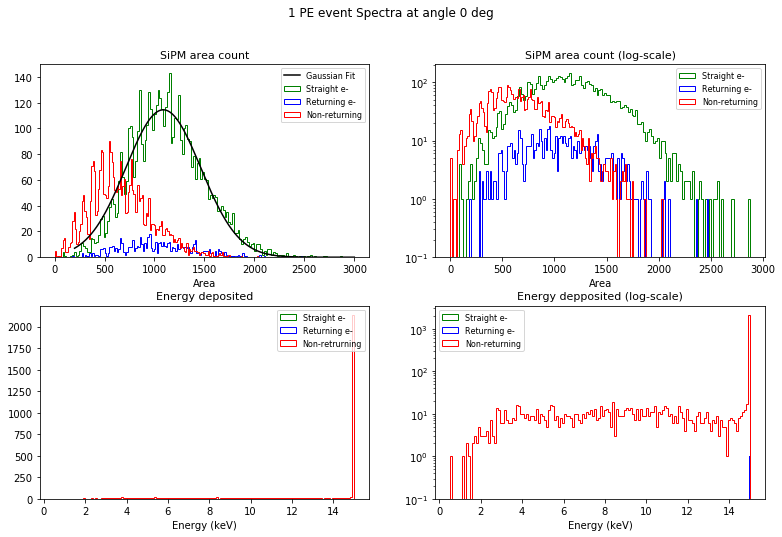

Results with 1 PE at angle 0 deg


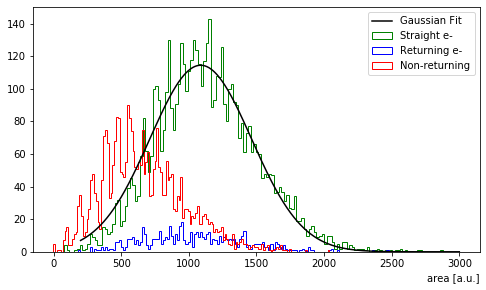

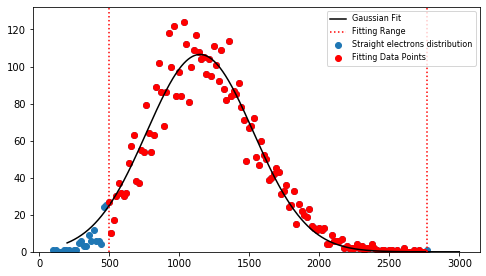

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.56
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.03


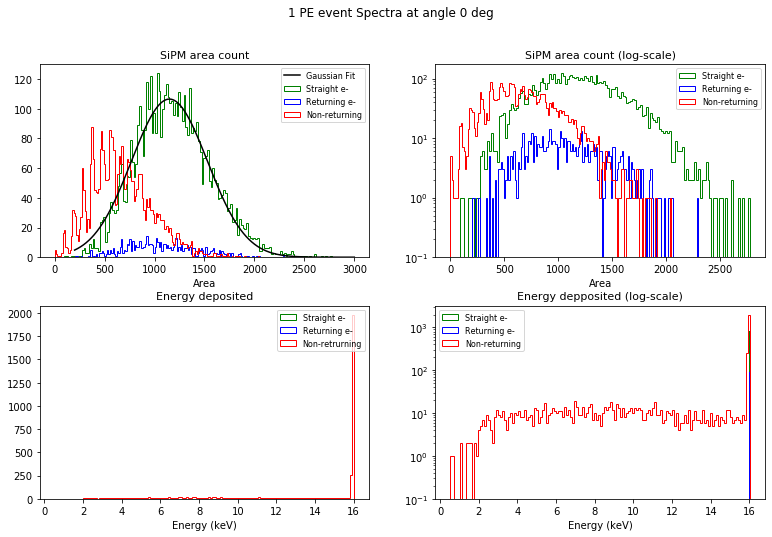

Results with 1 PE at angle 0 deg


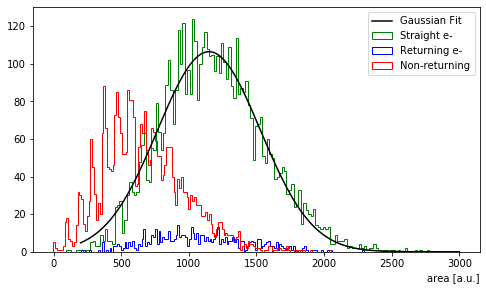

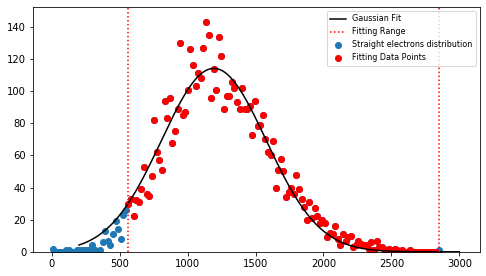

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.34
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.03


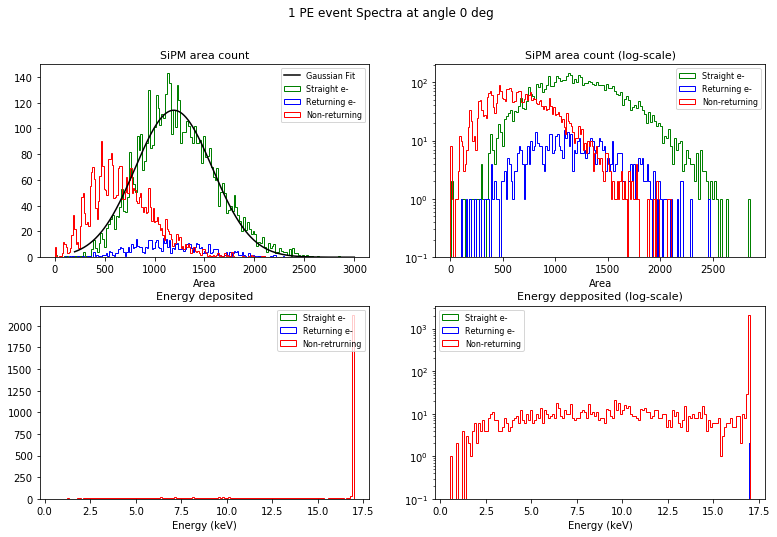

Results with 1 PE at angle 0 deg


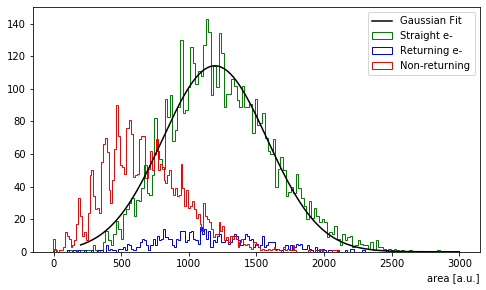

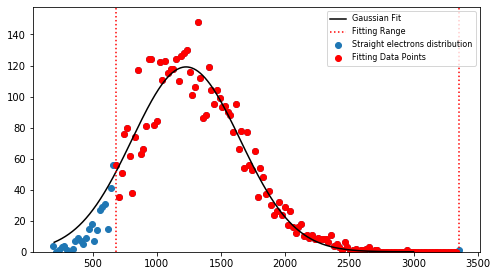

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.06
Portion of non-returning back-scattered electrons: 0.34
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.03


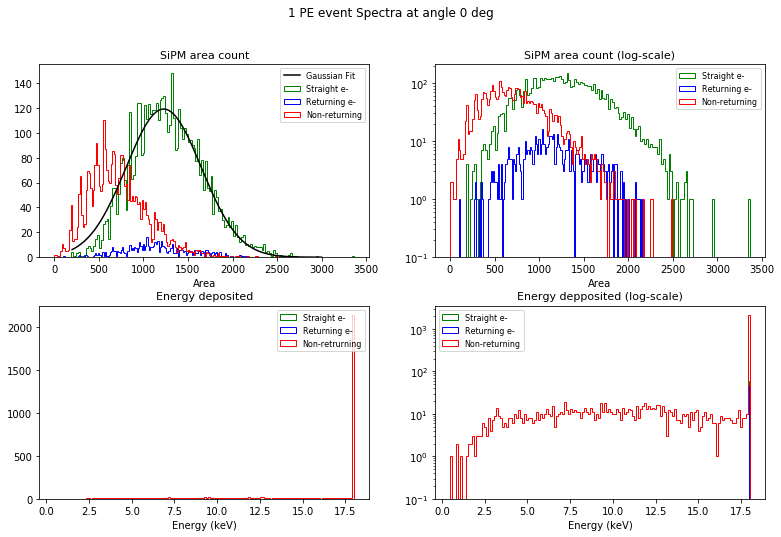

Results with 1 PE at angle 0 deg


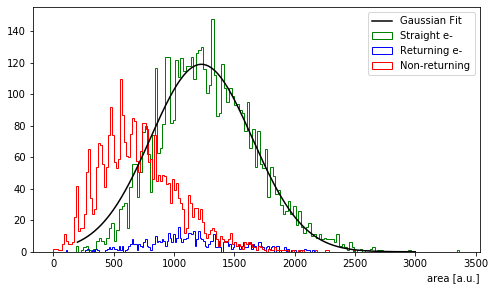

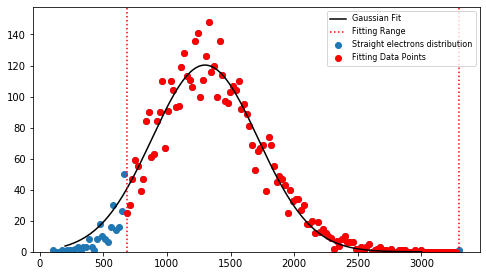

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.58
Portion of returning back-scattered electrons: 0.05
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.02


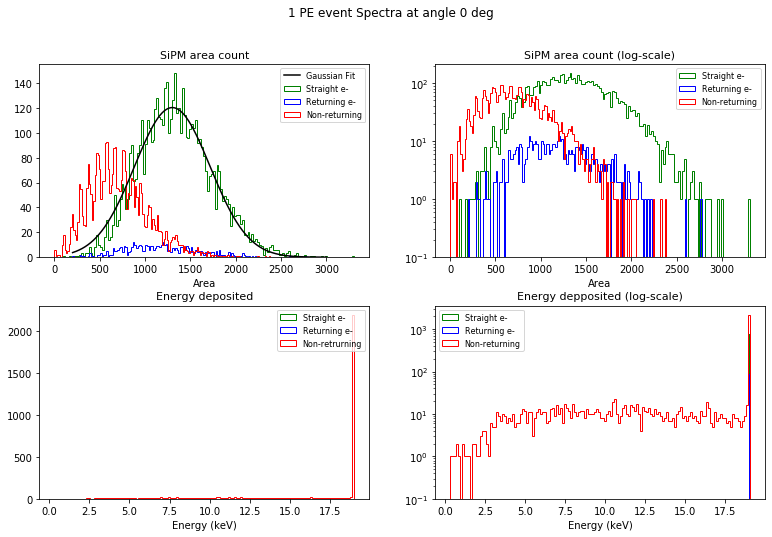

Results with 1 PE at angle 0 deg


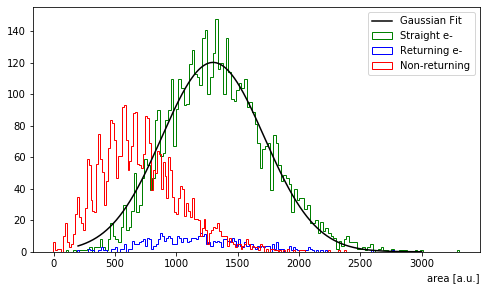

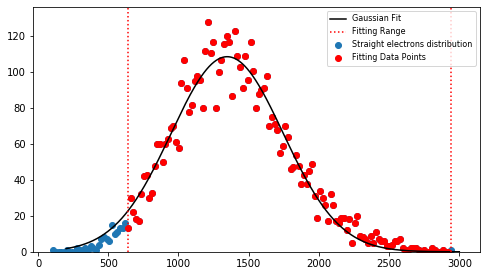

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.57
Portion of returning back-scattered electrons: 0.05
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.41
Portion of undetected electrons: 0.02


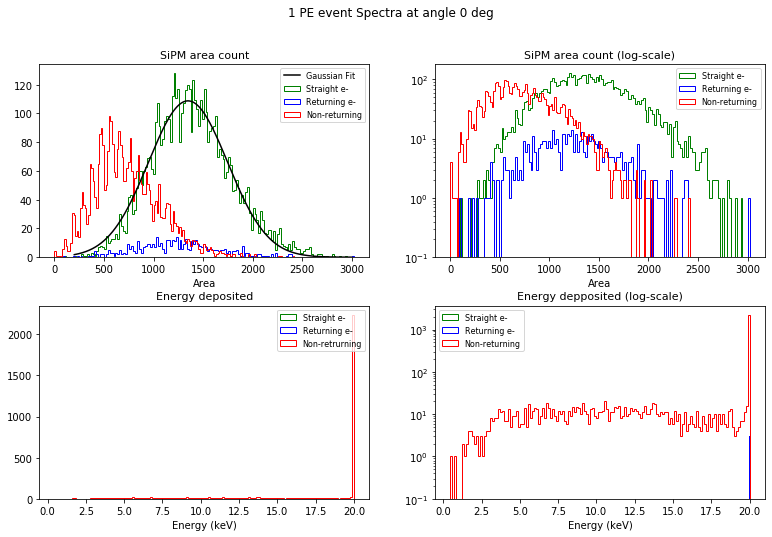

Results with 1 PE at angle 0 deg


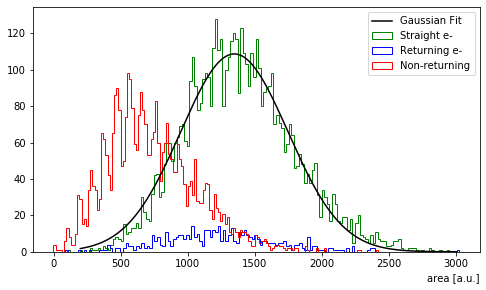

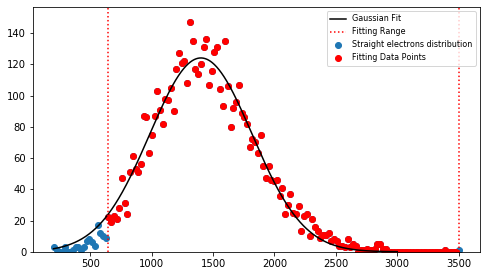

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.58
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.35
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.02


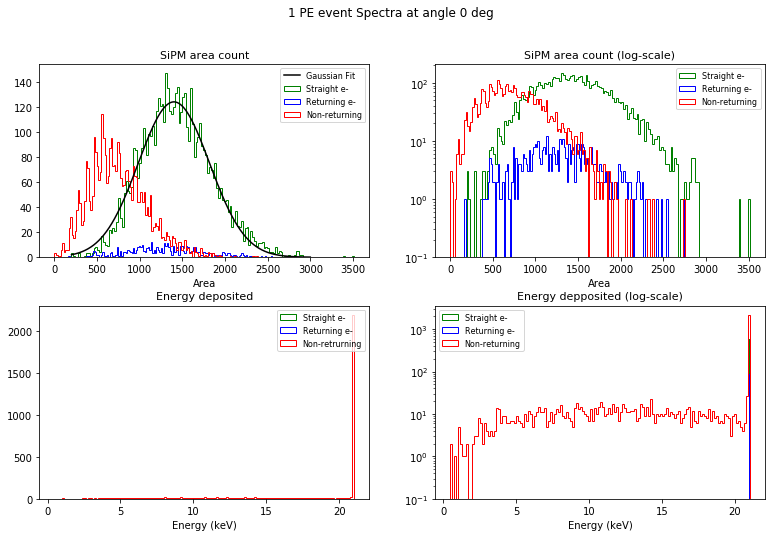

Results with 1 PE at angle 0 deg


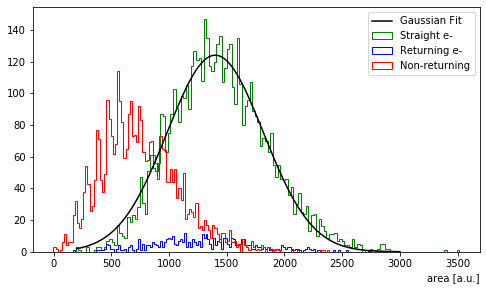

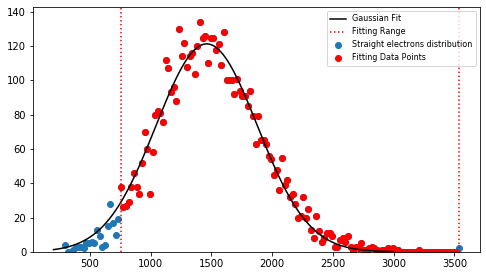

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.58
Portion of returning back-scattered electrons: 0.05
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.02


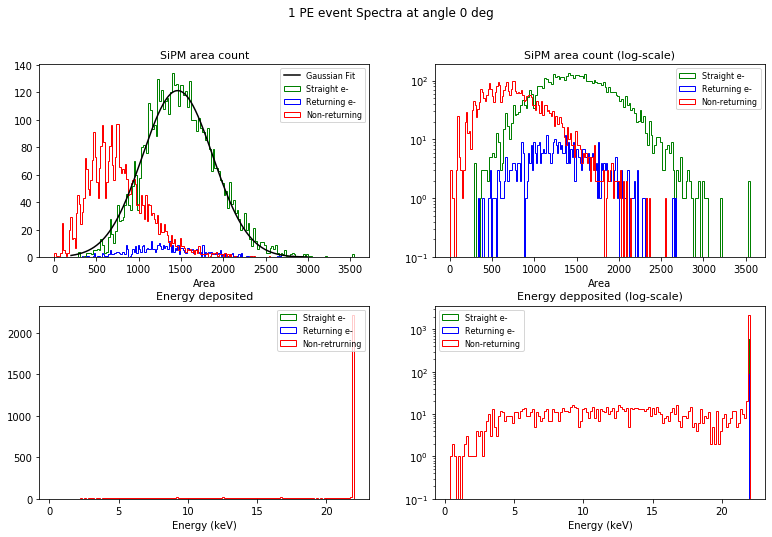

Results with 1 PE at angle 0 deg


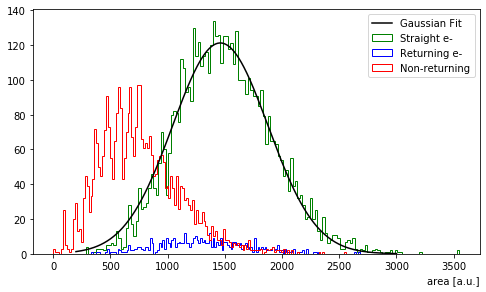

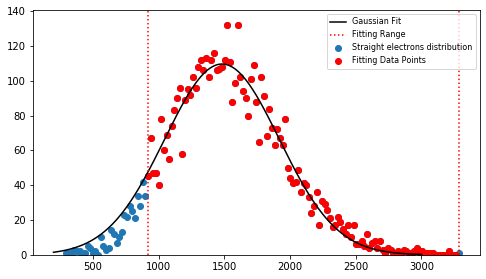

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.58
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.01


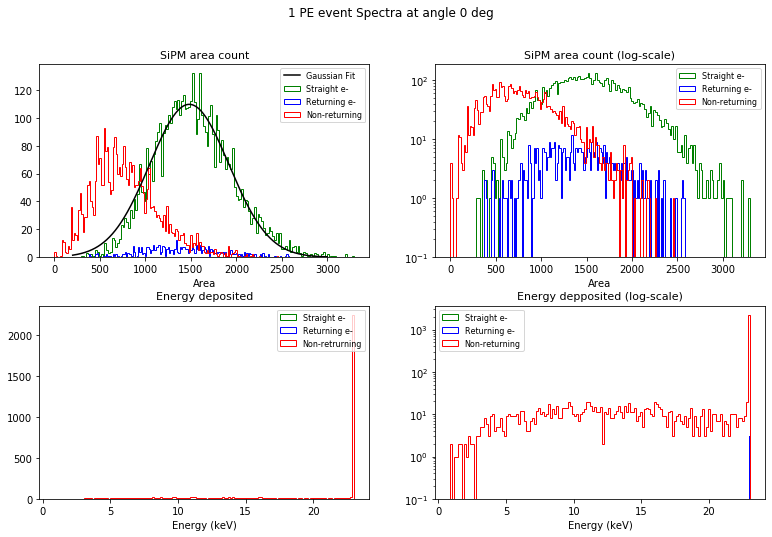

Results with 1 PE at angle 0 deg


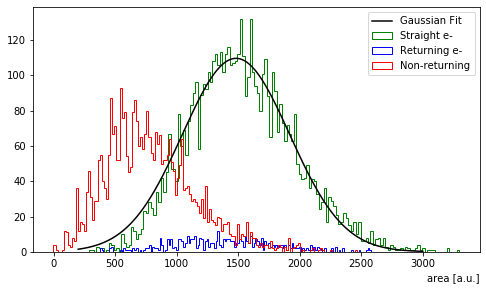

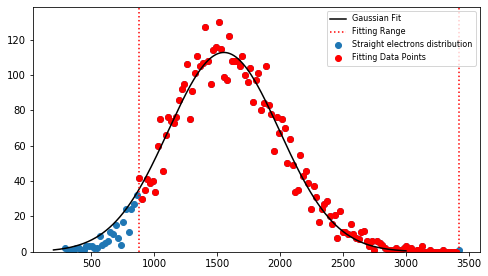

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.59
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.01


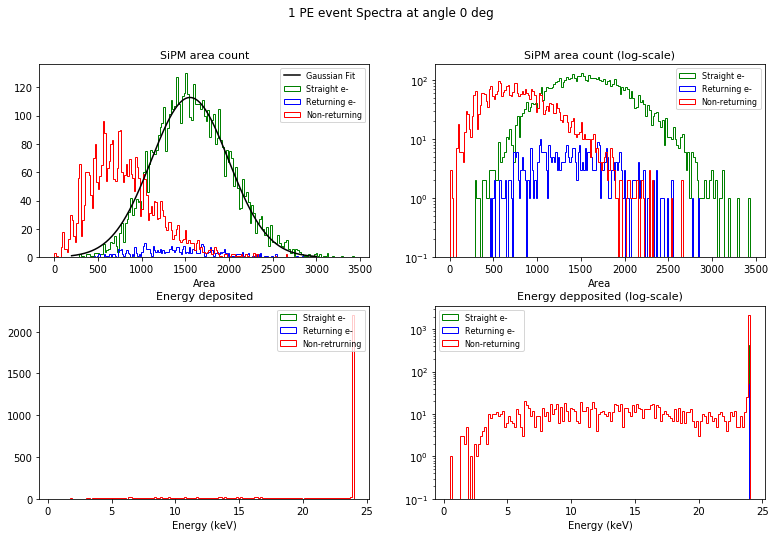

Results with 1 PE at angle 0 deg


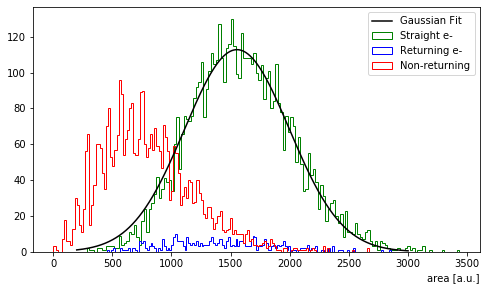

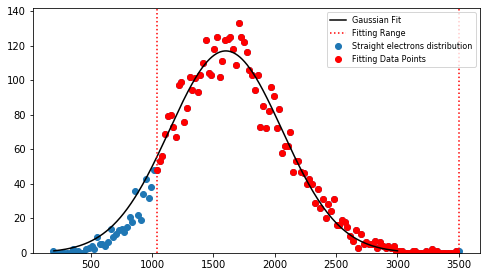

 ** Summary of the electrons ** 
Total electrons: 10000
Portion of straight electrons: 0.59
Portion of returning back-scattered electrons: 0.04
Portion of non-returning back-scattered electrons: 0.36
Portion of back-scattered electrons (returning+non-returning): 0.40
Portion of undetected electrons: 0.01


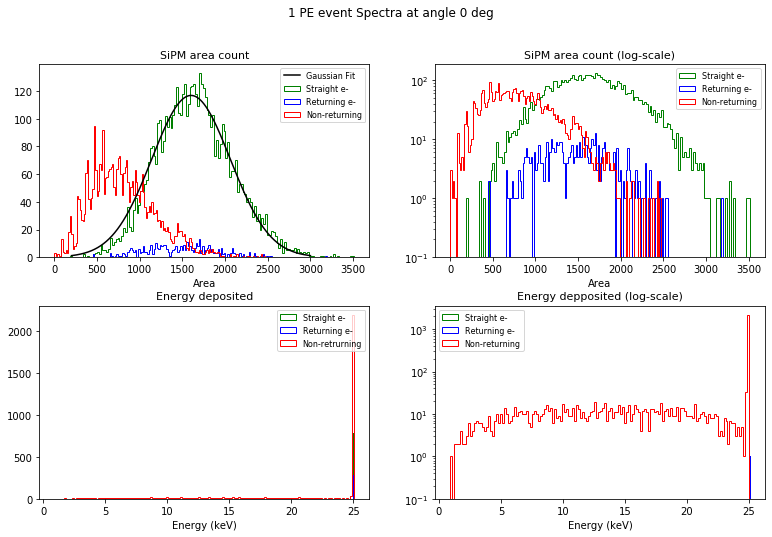

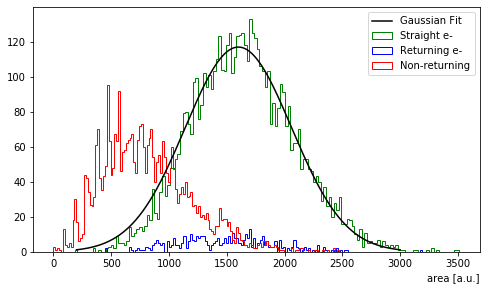

In [4]:
mus = []
for i,volt in enumerate(range(5,26)):
    mu = simulation_spectra(voltage=volt)
    mus.append(mu)

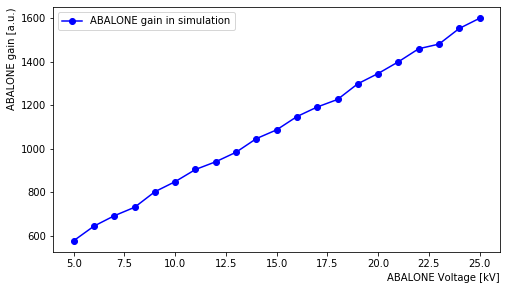

In [5]:
plt.figure(figsize=(8,4.5))
gain = np.array(mus)
voltage = np.arange(5,26)
plt.plot(voltage,gain,color='b',marker='o',label='ABALONE gain in simulation')
plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1)
plt.ylabel('ABALONE gain [a.u.)',ha='right',y=1)
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.legend()
plt.savefig('ThGain.png',dpi=800)

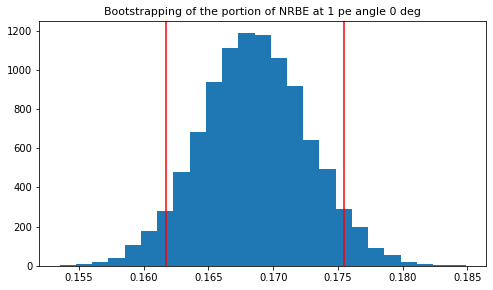

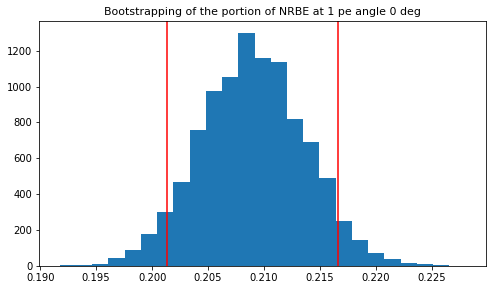

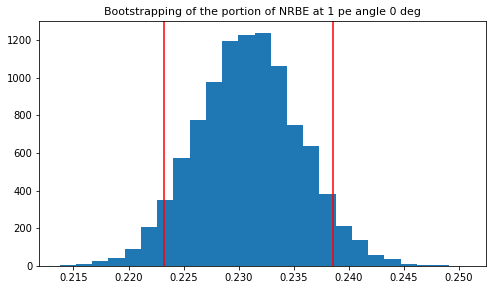

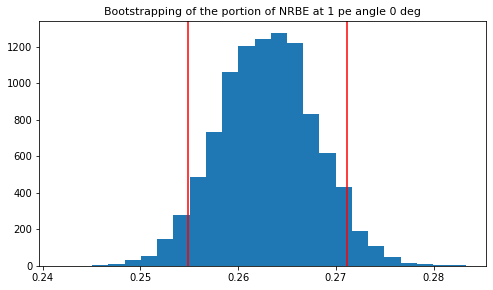

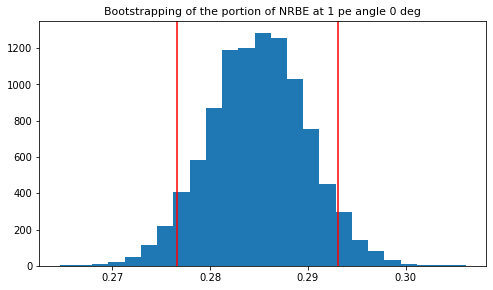

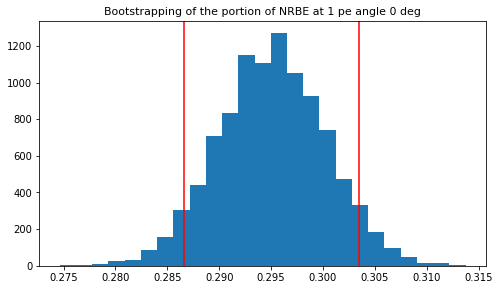

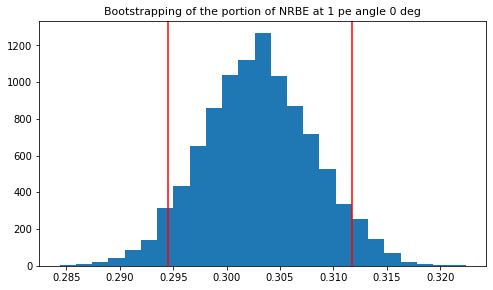

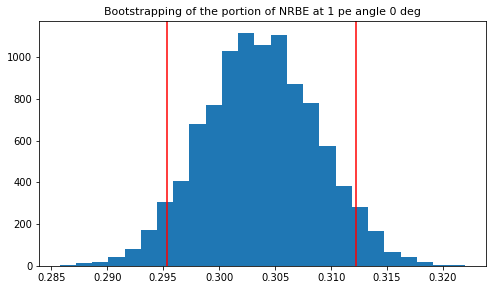

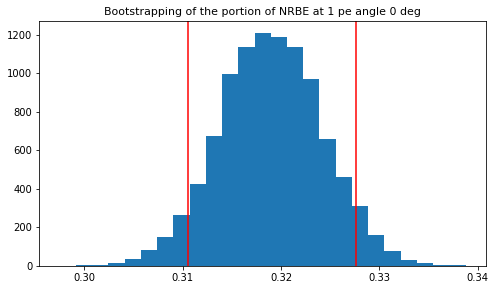

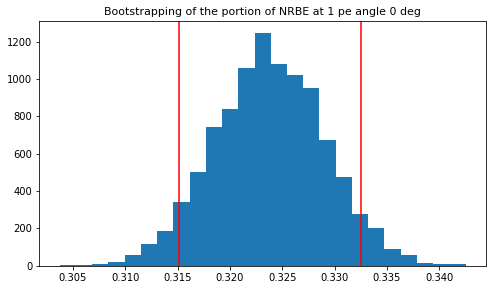

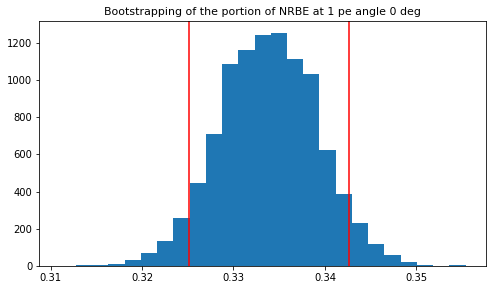

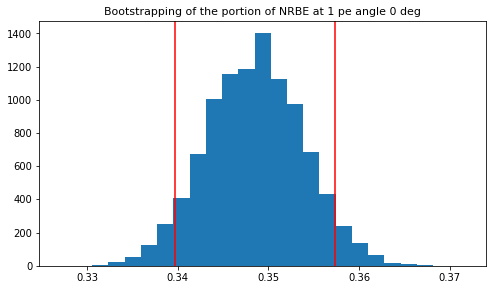

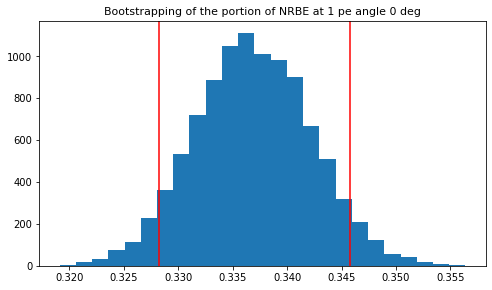

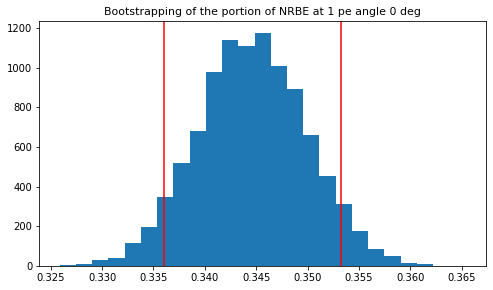

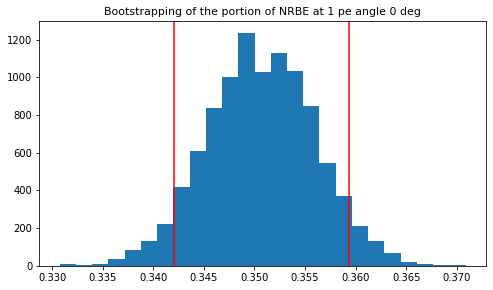

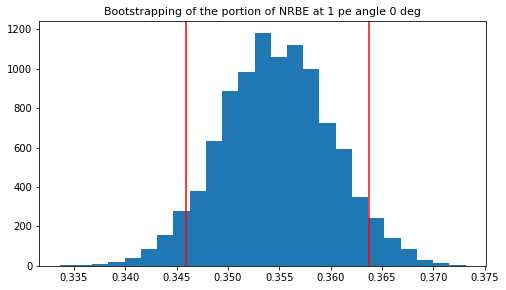

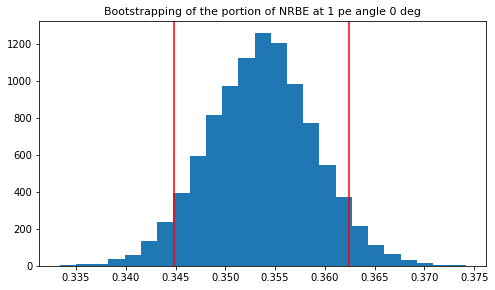

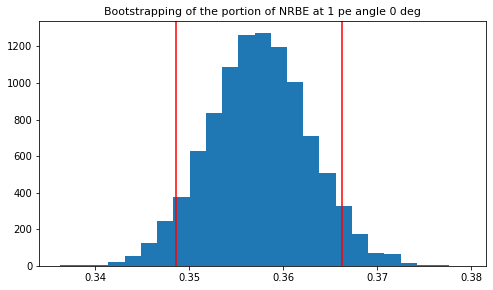

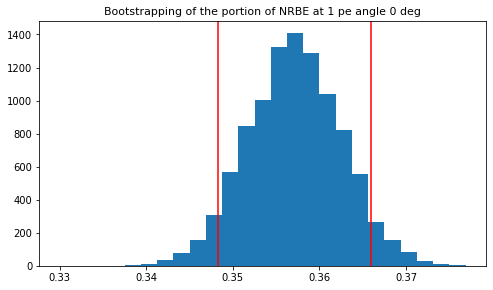

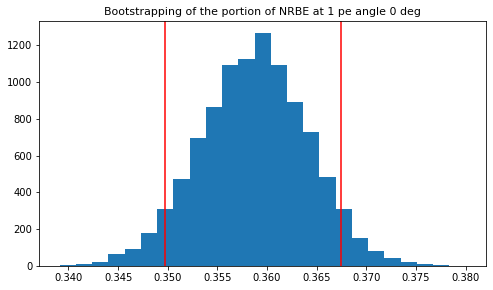

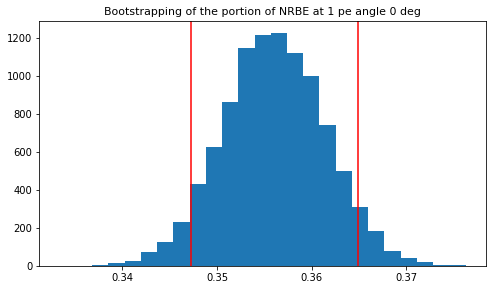

In [6]:
stats = []
for i,volt in enumerate(range(5,26)):
    stat = simulation_stat(voltage=volt)
    stats.append(stat)

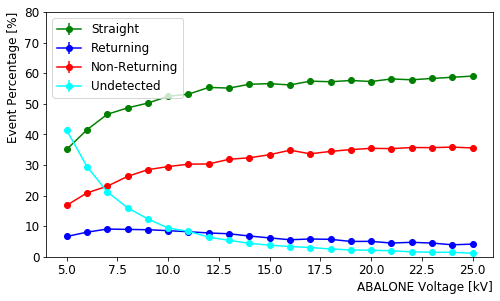

In [10]:
SE = [i[0][0] for i in stats]
SE_var = [i[0][3] for i in stats]
RE = [i[1][0] for i in stats]
RE_var = [i[1][3] for i in stats]
NRBE = [i[2][0] for i in stats]
NRBE_var = [i[2][3] for i in stats]
NE = [i[3][0] for i in stats]
NE_var = [i[3][3] for i in stats]
SE = np.array(SE)*100
SE_var = np.array(SE_var)*100
RE = np.array(RE)*100
RE_var = np.array(RE_var)*100
NE = np.array(NE)*100
NE_var = np.array(NE_var)*100
NRBE = np.array(NRBE)*100
NRBE_var = np.array(NRBE_var)*100
voltage = np.arange(5,26)
plt.figure(figsize=(8,4.5))
plt.errorbar(voltage,SE,yerr=SE_var,marker='o',label="Straight",color="Green")
plt.errorbar(voltage,RE,yerr=RE_var,marker='o',label="Returning",color="Blue")
plt.errorbar(voltage,NRBE,yerr=NRBE_var,marker='o',label="Non-Returning",color="Red")
plt.errorbar(voltage,NE,yerr=NE_var,marker='o',label="Undetected",color="cyan")
plt.ylim(0,80)
#plt.xlim(-0.5,90)

#plt.title("Portion of Non-returning back scattered electrons",size=14)
plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1,fontsize=12)
plt.ylabel('Event Percentage [%]',ha='right',y=1,fontsize=12)
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(fontsize=12)
plt.savefig('events_vs_v.png',dpi=800)
#path = "./plots/NRBE/"
#plt.savefig(path+"Portion",transparent=False)

#plt.figure(figsize=(12,6))
#eff = np.array([stats[:][3][0]])
#plt.plot(np.array([17,18,19,20]),1-eff,'o')
#plt.title("Detection Efficiency",size=14)
#plt.xlabel('ABALONE Voltage [kV]',ha='right',x=1,fontsize=14)
#plt.ylabel('Efficiency',ha='right',y=1,fontsize=14)
#plt.tick_params(axis='x',labelsize=14)
#plt.tick_params(axis='y',labelsize=14)
#plt.ylim(0.,1.1)
#path = "./plots/NRBE/"
#plt.savefig(path+"Detector_Efficiency",transparent=False)